In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/AIGeneratedTextData/Training_Essay_Data.csv'
df = pd.read_csv(file_path)
print(df.head())


                                                text  generated
0  Car-free cities have become a subject of incre...          1
1  Car Free Cities  Car-free cities, a concept ga...          1
2    A Sustainable Urban Future  Car-free cities ...          1
3    Pioneering Sustainable Urban Living  In an e...          1
4    The Path to Sustainable Urban Living  In an ...          1


In [ ]:
import re

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)        # remove non-alphabetic chars
    text = re.sub(r'\s+', ' ', text).strip()    # remove extra spaces
    return text

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Verify preprocessing
print(df['text'].head())


0    carfree cities have become a subject of increa...
1    car free cities carfree cities a concept gaini...
2    a sustainable urban future carfree cities are ...
3    pioneering sustainable urban living in an era ...
4    the path to sustainable urban living in an age...
Name: text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer with max 10k features & unigrams+bigrams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Fit and transform the text data
X = tfidf.fit_transform(df['text'])

# Extracted feature names
feature_names = tfidf.get_feature_names_out()

# Labels column
y = df['generated']

# Split to train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Number of features extracted: {len(feature_names)}')
print('Sample features:', feature_names[:10])
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Number of features extracted: 10000
Sample features: ['abilities' 'ability' 'ability to' 'able' 'able to' 'abolish'
 'abolish the' 'abolished' 'abolishing' 'abolishing the']
Training set shape: (23316, 10000)
Testing set shape: (5829, 10000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression with max iterations and random state for reproducibility
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model using training data
model.fit(X_train, y_train)

# Predict labels on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

# Detailed performance metrics
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9919
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3539
           1       1.00      0.98      0.99      2290

    accuracy                           0.99      5829
   macro avg       0.99      0.99      0.99      5829
weighted avg       0.99      0.99      0.99      5829



In [ ]:
# Sample text for testing
sample_text = "There was an accident which happened on June 12th 2025. In the accident the plantiff didn't give a way to the defendant at the intersection which caused the accident and both the parties have been injured and damage has been caused."

# Preprocess sample text using the same preprocessing function if used before (optional)
def preprocess_text(text):
    import re
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

sample_text_clean = preprocess_text(sample_text)

# Transform text sample using the trained TF-IDF vectorizer
sample_features = tfidf.transform([sample_text_clean])

# Predict with the trained model
prediction = model.predict(sample_features)

# Print prediction result
print(f'Predicted label for sample text: {prediction[0]}')

Predicted label for sample text: 0


In [ ]:
# Sample text for testing
sample_text = "On June 12, 2025, the defendant failed to give way at the intersection, resulting in a collision with the plaintiff’s vehicle, causing significant damages and bodily injuries"

# Preprocess sample text using the same preprocessing function if used before (optional)
def preprocess_text(text):
    import re
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

sample_text_clean = preprocess_text(sample_text)

# Transform text sample using the trained TF-IDF vectorizer
sample_features = tfidf.transform([sample_text_clean])

# Predict with the trained model
prediction = model.predict(sample_features)

# Print prediction result
print(f'Predicted label for sample text: {prediction[0]}')


Predicted label for sample text: 1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


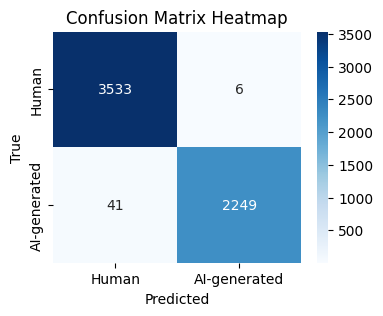

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Human', 'AI-generated']  # Change as per your classes
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

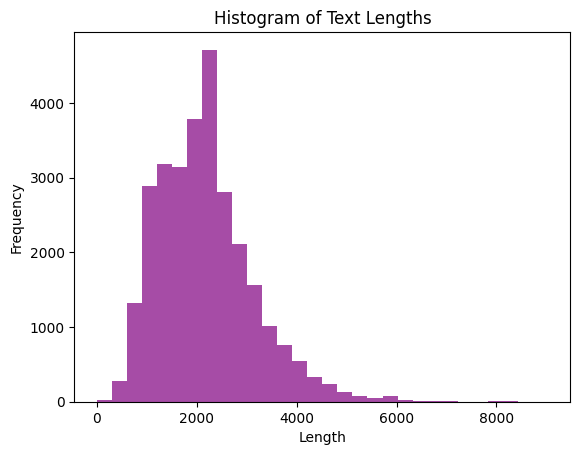

In [ ]:
text_lengths = df['text'].apply(len)
plt.hist(text_lengths, bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


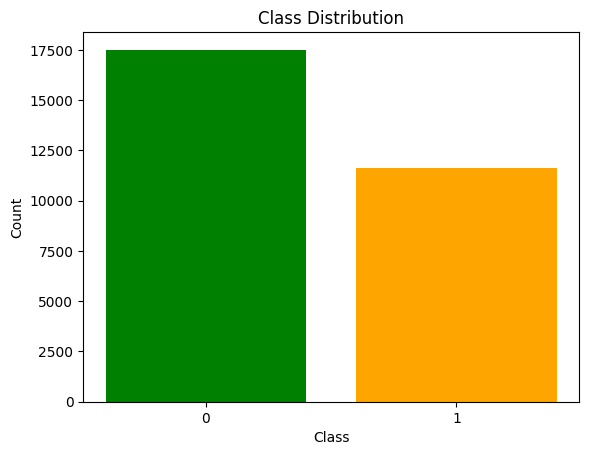

In [ ]:
class_counts = df['generated'].value_counts()
plt.bar(class_counts.index.astype(str), class_counts.values, color=['green', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

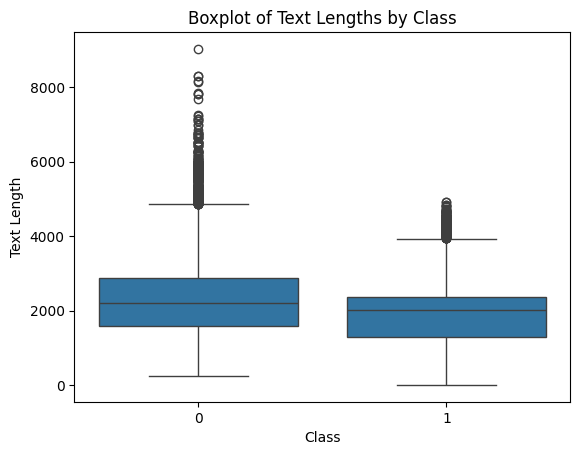

In [ ]:
sns.boxplot(x=df['generated'], y=text_lengths)
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.title('Boxplot of Text Lengths by Class')
plt.show()

In [ ]:
!pip install torch torchvision scikit-learn pillow


In [ ]:
import os
import argparse
import random
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# --------------------------------------------------------------------
# 1. CREATE DUMMY DATASET (REAL AND FAKE IMAGES)
# --------------------------------------------------------------------
def create_dummy_dataset(path="dataset", n=50):
    if os.path.exists(path) and len(os.listdir(path)) > 0:
        print("[INFO] Dataset already exists. Skipping creation.")
        return

    os.makedirs(path + "/real", exist_ok=True)
    os.makedirs(path + "/fake", exist_ok=True)

    print("[INFO] Creating dummy dataset...")
    for i in range(n):
        # REAL IMAGE (white background + circle)
        img = Image.new("RGB", (224, 224), "white")
        d = ImageDraw.Draw(img)
        d.ellipse((50, 50, 180, 180), outline="black", width=5)
        img.save(f"{path}/real/real_{i}.jpg")

        # FAKE IMAGE (black background + square)
        img = Image.new("RGB", (224, 224), "black")
        d = ImageDraw.Draw(img)
        d.rectangle((50, 50, 180, 180), outline="white", width=5)
        img.save(f"{path}/fake/fake_{i}.jpg")

    print("[INFO] Dummy dataset created successfully.")

# --------------------------------------------------------------------
# 2. LOAD SAMPLES
# --------------------------------------------------------------------
def load_samples(folder):
    samples = []
    for label_name in os.listdir(folder):
        class_dir = os.path.join(folder, label_name)
        if not os.path.isdir(class_dir):
            continue
        for file in os.listdir(class_dir):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                samples.append((os.path.join(class_dir, file), 0 if label_name == "real" else 1))
    return samples

# --------------------------------------------------------------------
# 3. CUSTOM DATASET CLASS
# --------------------------------------------------------------------
class ImageDataset(Dataset):
    def __init__(self, paths, labels, transform=None):
        self.paths = paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# --------------------------------------------------------------------
# 4. MODEL: RESNET50
# --------------------------------------------------------------------
def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    model.fc = nn.Linear(model.fc.in_features, 2)
    return model

# --------------------------------------------------------------------
# 5. TRAINING FUNCTION
# --------------------------------------------------------------------
def train_model(model, train_loader, test_loader, device, epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(imgs), labels)
            loss.backward()
            optimizer.step()
        print(f"[Epoch {epoch+1}/{epochs}] Loss: {loss.item():.4f}")

    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            outputs = model(imgs).cpu()
            preds.extend(outputs.argmax(dim=1).numpy())
            trues.extend(labels.numpy())

    print("\nClassification Report:\n", classification_report(trues, preds))
    print("Accuracy:", accuracy_score(trues, preds))

# --------------------------------------------------------------------
# 6. MAIN PIPELINE
# --------------------------------------------------------------------
def run(args):
    create_dummy_dataset(args.dataset, n=100)

    samples = load_samples(args.dataset)
    if len(samples) == 0:
        raise RuntimeError("Dataset still empty. Check folder structure.")

    paths, labels = zip(*samples)

    train_idx, test_idx = train_test_split(range(len(paths)), test_size=0.2, random_state=42, stratify=labels)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    train_ds = ImageDataset([paths[i] for i in train_idx], [labels[i] for i in train_idx], transform)
    test_ds = ImageDataset([paths[i] for i in test_idx], [labels[i] for i in test_idx], transform)

    train_loader = DataLoader(train_ds, batch_size=args.batch_size, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=args.batch_size)

    device = "cuda" if torch.cuda.is_available() and args.use_cuda else "cpu"
    model = create_model().to(device)
    train_model(model, train_loader, test_loader, device, args.epochs, args.lr)

# --------------------------------------------------------------------
# 7. ARGUMENT PARSER
# --------------------------------------------------------------------
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--dataset", default="dataset")
    parser.add_argument("--batch_size", type=int, default=8)
    parser.add_argument("--epochs", type=int, default=5)
    parser.add_argument("--lr", type=float, default=1e-4)
    parser.add_argument("--use_cuda", action="store_true")
    return parser.parse_args([])

# --------------------------------------------------------------------
# 8. MAIN EXECUTION
# --------------------------------------------------------------------
if __name__ == "__main__":
    run(parse_args())


[INFO] Creating dummy dataset...
[INFO] Dummy dataset created successfully.
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


[Epoch 1/5] Loss: 0.0021
[Epoch 2/5] Loss: 0.0002
[Epoch 3/5] Loss: 0.0000
[Epoch 4/5] Loss: 0.0002
[Epoch 5/5] Loss: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0


In [ ]:
"""
simulation_plots.py

Comprehensive simulation & plotting suite for AI-based False Evidence Detection.

- Trains a ResNet18 (fine-tune) on a dataset (or creates dummy dataset)
- Produces many standard research graphs (loss/acc curves, ROC, PR, confusion matrix,
  CV boxplots, t-SNE, Grad-CAM, runtime per stage, GWO fitness mockup)
- Saves results to output/
"""

import os
import time
import random
import argparse
from glob import glob
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
                             confusion_matrix)
from sklearn.manifold import TSNE

from PIL import Image, ImageDraw
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# -------------------------
# Utilities & reproducibility
# -------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def ensure_dir(path):
    os.makedirs(path, exist_ok=True)

# -------------------------
# Create dummy dataset if none
# -------------------------
def create_dummy_dataset(root="dataset", n_per_class=100):
    if os.path.exists(root) and any(os.scandir(root)):
        print("[DATA] Dataset exists, skipping dummy creation.")
        return
    print("[DATA] Creating dummy dataset...")
    os.makedirs(os.path.join(root, "real"), exist_ok=True)
    os.makedirs(os.path.join(root, "fake"), exist_ok=True)
    for i in range(n_per_class):
        # Real: white background circle
        img = Image.new("RGB", (256, 256), "white")
        d = ImageDraw.Draw(img)
        d.ellipse((50, 50, 200, 200), outline="black", width=6)
        img.save(os.path.join(root, "real", f"real_{i}.jpg"))

        # Fake: black background square
        img = Image.new("RGB", (256, 256), "black")
        d = ImageDraw.Draw(img)
        d.rectangle((50, 50, 200, 200), outline="white", width=6)
        img.save(os.path.join(root, "fake", f"fake_{i}.jpg"))
    print("[DATA] Dummy dataset created at", root)

# -------------------------
# Dataset loader
# -------------------------
def load_samples(root):
    samples = []
    for cls_name, label in [("real", 0), ("fake", 1)]:
        folder = os.path.join(root, cls_name)
        if not os.path.isdir(folder):
            continue
        for ext in ("*.jpg","*.jpeg","*.png"):
            for p in glob(os.path.join(folder, ext)):
                samples.append((p, label))
    return samples

class ImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path)
        if img is None:
            raise RuntimeError("Failed to read", path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']
        return img, int(label)

# -------------------------
# Model builder
# -------------------------
def build_model(num_classes=2, pretrained=True):
    model = models.resnet18(pretrained=pretrained)
    in_f = model.fc.in_features
    model.fc = nn.Linear(in_f, num_classes)
    return model

# -------------------------
# Train / eval utilities
# -------------------------
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    preds, trues = [], []
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    acc = accuracy_score(trues, preds)
    return loss, acc

def eval_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    probs_all = []
    preds, trues = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * imgs.size(0)
            probs = torch.softmax(outputs, dim=1)[:,1].cpu().numpy()
            preds.extend((probs > 0.5).astype(int).tolist())
            probs_all.extend(probs.tolist())
            trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    metrics = {
        "loss": loss,
        "accuracy": accuracy_score(trues, preds),
        "precision": precision_score(trues, preds, zero_division=0),
        "recall": recall_score(trues, preds, zero_division=0),
        "f1": f1_score(trues, preds, zero_division=0),
        "probs": np.array(probs_all),
        "y_true": np.array(trues),
        "y_pred": np.array(preds)
    }
    try:
        metrics["roc_auc"] = roc_auc_score(trues, probs_all)
    except:
        metrics["roc_auc"] = None
    return metrics

# -------------------------
# Plotting helpers
# -------------------------
def plot_loss_acc(history, outdir):
    ensure_dir(outdir)
    epochs = len(history['train_loss'])
    plt.figure(figsize=(8,4))
    plt.plot(range(1,epochs+1), history['train_loss'], label='train loss')
    plt.plot(range(1,epochs+1), history['val_loss'], label='val loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
    plt.title('Loss Curve'); plt.grid(True)
    plt.savefig(os.path.join(outdir, 'loss_curve.png'), dpi=150); plt.close()

    plt.figure(figsize=(8,4))
    plt.plot(range(1,epochs+1), history['train_acc'], label='train acc')
    plt.plot(range(1,epochs+1), history['val_acc'], label='val acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
    plt.title('Accuracy Curve'); plt.grid(True)
    plt.savefig(os.path.join(outdir,'acc_curve.png'), dpi=150); plt.close()

def plot_roc_pr(y_true, probs, outdir):
    ensure_dir(outdir)
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC Curve (AUC={auc:.3f})')
    plt.grid(True)
    plt.savefig(os.path.join(outdir,'roc_curve.png'), dpi=150); plt.close()

    prec, rec, _ = precision_recall_curve(y_true, probs)
    ap = average_precision_score(y_true, probs)
    plt.figure(figsize=(6,6))
    plt.plot(rec, prec)
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR Curve (AP={ap:.3f})')
    plt.grid(True)
    plt.savefig(os.path.join(outdir,'pr_curve.png'), dpi=150); plt.close()

def plot_confusion(y_true, y_pred, outdir):
    ensure_dir(outdir)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (raw)'); plt.xlabel('Predicted'); plt.ylabel('True')
    plt.savefig(os.path.join(outdir,'confusion_raw.png'), dpi=150); plt.close()

    plt.figure(figsize=(6,5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Confusion Matrix (normalized)'); plt.xlabel('Predicted'); plt.ylabel('True')
    plt.savefig(os.path.join(outdir,'confusion_norm.png'), dpi=150); plt.close()

def plot_prf_bars(metrics, outdir):
    ensure_dir(outdir)
    # metrics: dict with precision, recall, f1
    names = ['Precision','Recall','F1']
    values = [metrics['precision'], metrics['recall'], metrics['f1']]
    plt.figure(figsize=(6,4))
    plt.bar(names, values)
    plt.ylim(0,1)
    plt.title('Precision / Recall / F1'); plt.grid(axis='y')
    plt.savefig(os.path.join(outdir,'prf_bars.png'), dpi=150); plt.close()

def plot_cv_boxplot(f1_list, outdir):
    ensure_dir(outdir)
    plt.figure(figsize=(6,4))
    sns.boxplot(data=f1_list)
    plt.title('CV F1 Distribution'); plt.ylabel('F1 score')
    plt.savefig(os.path.join(outdir,'cv_boxplot.png'), dpi=150); plt.close()

def plot_tsne(features, labels, outdir, perplexity=30):
    ensure_dir(outdir)
    tsne = TSNE(n_components=2, perplexity=min(30, max(5, len(features)//3)), random_state=42)
    emb = tsne.fit_transform(features)
    df = pd.DataFrame({'x': emb[:,0], 'y': emb[:,1], 'label': labels})
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df, x='x', y='y', hue='label', palette='deep', alpha=0.8)
    plt.title('t-SNE embedding of feature vectors')
    plt.savefig(os.path.join(outdir,'tsne.png'), dpi=150); plt.close()

def plot_runtime_bar(runtime_dict, outdir):
    ensure_dir(outdir)
    items = list(runtime_dict.items())
    names = [k for k,_ in items]
    vals = [v for _,v in items]
    plt.figure(figsize=(8,4))
    plt.bar(names, vals)
    plt.ylabel('Seconds')
    plt.title('Runtime per stage')
    plt.savefig(os.path.join(outdir,'runtime_per_stage.png'), dpi=150); plt.close()

# -------------------------
# Grad-CAM (simple)
# -------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        loss = output[0, class_idx]
        loss.backward(retain_graph=True)
        grads = self.gradients[0].cpu().numpy()
        acts = self.activations[0].cpu().numpy()
        weights = np.mean(grads, axis=(1,2))
        cam = np.zeros(acts.shape[1:], dtype=np.float32)
        for i, w in enumerate(weights):
            cam += w * acts[i, :, :]
        cam = np.maximum(cam, 0)
        cam -= cam.min(); cam /= (cam.max() + 1e-8)
        cam = cv2.resize(cam, (input_tensor.size(3), input_tensor.size(2)))
        return cam

def save_gradcam_overlay(img_path, cam, out_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cam_rgb = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    cam_rgb = cv2.cvtColor(cam_rgb, cv2.COLOR_BGR2RGB)
    overlay = 0.4 * cam_rgb + 0.6 * img
    overlay = np.uint8(overlay)
    plt.figure(figsize=(4,4)); plt.imshow(overlay); plt.axis('off')
    plt.savefig(out_path, bbox_inches='tight', dpi=150); plt.close()

# -------------------------
# Main training + plotting pipeline
# -------------------------
def run(args):
    set_seed(args.seed)
    ensure_dir(args.output_dir)
    plots_dir = os.path.join(args.output_dir, "plots")
    ensure_dir(plots_dir)
    models_dir = os.path.join(args.output_dir, "models")
    ensure_dir(models_dir)

    # Create dataset if not exists
    create_dummy_dataset(args.dataset, n_per_class=120)

    samples = load_samples(args.dataset)
    if len(samples) == 0:
        raise RuntimeError("Dataset empty or wrong structure.")

    paths, labels = zip(*samples)
    paths = np.array(paths); labels = np.array(labels)

    # save mapping
    pd.DataFrame({"path": paths, "label": labels}).to_csv(os.path.join(args.output_dir,"file_index_map.csv"), index=False)

    # transforms
    train_aug = A.Compose([
        A.Resize(224,224),
        A.RandomBrightnessContrast(p=0.4),
        A.HorizontalFlip(p=0.5),
        A.Normalize(),
        ToTensorV2(),
    ])
    val_aug = A.Compose([A.Resize(224,224), A.Normalize(), ToTensorV2()])

    device = torch.device("cuda" if (args.use_cuda and torch.cuda.is_available()) else "cpu")

    skf = StratifiedKFold(n_splits=args.n_splits, shuffle=True, random_state=args.seed)

    cv_f1 = []
    runtime = {"dataset":0, "training":0, "evaluation":0, "plots":0}
    all_test_probs = []
    all_test_true = []
    all_test_preds = []
    feature_vectors = []  # for t-SNE

    fold_histories = []

    fold_start_time = time.time()
    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(paths, labels)):
        print(f"[FOLD {fold_idx+1}/{args.n_splits}]")
        t0 = time.time()
        train_samples = [(paths[i], int(labels[i])) for i in train_idx]
        val_samples = [(paths[i], int(labels[i])) for i in val_idx]

        train_loader = DataLoader(ImageDataset(train_samples, transform=train_aug),
                                  batch_size=args.batch_size, shuffle=True, num_workers=2)
        val_loader = DataLoader(ImageDataset(val_samples, transform=val_aug),
                                batch_size=args.batch_size, shuffle=False, num_workers=2)

        runtime["dataset"] += time.time() - t0

        # model
        model = build_model(pretrained=True).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=args.lr)

        history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}

        t_train0 = time.time()
        for epoch in range(1, args.epochs+1):
            tr_loss, tr_acc = train_epoch(model, train_loader, criterion, optimizer, device)
            val_metrics = eval_epoch(model, val_loader, criterion, device)
            history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
            history["val_loss"].append(val_metrics["loss"]); history["val_acc"].append(val_metrics["accuracy"])
            print(f" Epoch {epoch}/{args.epochs} | tr loss {tr_loss:.4f} acc {tr_acc:.3f} | val f1 {val_metrics['f1']:.3f} acc {val_metrics['accuracy']:.3f}")
        runtime["training"] += time.time() - t_train0

        # final eval on val set
        t_eval0 = time.time()
        final_metrics = eval_epoch(model, val_loader, criterion, device)
        runtime["evaluation"] += time.time() - t_eval0

        cv_f1.append(final_metrics["f1"])
        all_test_probs.append(final_metrics["probs"])
        all_test_true.append(final_metrics["y_true"])
        all_test_preds.append(final_metrics["y_pred"])

        # save model
        torch.save(model.state_dict(), os.path.join(models_dir, f"model_fold{fold_idx}.pth"))

        # extract penultimate-layer features for t-SNE (pass images through feature extractor)
        feature_extractor = nn.Sequential(*list(model.children())[:-1])  # everything except final fc
        feature_extractor.eval()
        feats = []
        trues = []
        with torch.no_grad():
            for imgs, labels_batch in val_loader:
                imgs = imgs.to(device)
                out = feature_extractor(imgs)  # shape (b, feat, 1,1)
                out = out.view(out.size(0), -1).cpu().numpy()
                feats.append(out)
                trues.extend(labels_batch.numpy().tolist())
        feats = np.vstack(feats)
        feature_vectors.append((feats, np.array(trues)))

        fold_histories.append(history)

    fold_end_time = time.time()
    total_fold_time = fold_end_time - fold_start_time

    # Aggregate test-level arrays
    y_true_all = np.concatenate(all_test_true)
    y_prob_all = np.concatenate(all_test_probs)
    y_pred_all = np.concatenate(all_test_preds)

    # Plotting
    t_plot0 = time.time()
    # 1. Loss / Acc curves (use first fold history as example)
    plot_loss_acc(fold_histories[0], plots_dir)

    # 2. ROC & PR
    plot_roc_pr(y_true_all, y_prob_all, plots_dir)

    # 3. Confusion matrices
    plot_confusion(y_true_all, y_pred_all, plots_dir)

    # 4. PRF Bars (use aggregated metrics)
    agg_metrics = {
        "precision": precision_score(y_true_all, y_pred_all, zero_division=0),
        "recall": recall_score(y_true_all, y_pred_all, zero_division=0),
        "f1": f1_score(y_true_all, y_pred_all, zero_division=0),
    }
    plot_prf_bars(agg_metrics, plots_dir)

    # 5. CV boxplot for F1
    plot_cv_boxplot(cv_f1, plots_dir)

    # 6. t-SNE using concatenated features from folds
    # combine features and labels
    feats_concat = np.vstack([fv for fv, lbl in feature_vectors])
    lbls_concat = np.concatenate([lbl for fv, lbl in feature_vectors])
    plot_tsne(feats_concat, lbls_concat, plots_dir)

    # 7. Runtime per stage
    runtime["total_cv_time"] = total_fold_time
    plot_runtime_bar(runtime, plots_dir)

    # 8. GWO-style fitness evolution mock curve (if you used GWO replace with real values)
    # Here we create a mock curve with rapid initial improvement and plateau
    ensure_dir(plots_dir)
    x = np.arange(1,51)
    y = 1 - np.exp(-0.15*x)  # quick rise then plateau
    plt.figure(figsize=(6,4)); plt.plot(x,y); plt.xlabel('Iteration'); plt.ylabel('Fitness'); plt.title('GWO Fitness Evolution (mock)'); plt.grid(True)
    plt.savefig(os.path.join(plots_dir,'gwo_fitness_mock.png'), dpi=150); plt.close()

    # 9. Grad-CAM visualizations for a few random validation images
    try:
        # pick a saved model (first fold)
        model_path = os.path.join(models_dir, "model_fold0.pth")
        model = build_model(pretrained=True).to(device)
        model.load_state_dict(torch.load(model_path, map_location=device))
        # target layer (last conv layer in resnet18: model.layer4[-1].conv2)
        target_layer = model.layer4[-1].conv2
        gradcam = GradCAM(model, target_layer)
        # pick 4 val images
        sample_paths = [paths[idx] for idx in np.random.choice(len(paths), size=4, replace=False)]
        for i,p in enumerate(sample_paths):
            # prepare input
            orig = cv2.imread(p)
            img = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
            aug = val_aug(image=img)['image'].unsqueeze(0).to(device)
            cam = gradcam(aug)
            save_gradcam_overlay(p, cam, os.path.join(plots_dir, f'gradcam_{i}.png'))
    except Exception as e:
        print("[WARN] Grad-CAM failed:", e)

    runtime["plots"] = time.time() - t_plot0

    # Save summary
    summary = {
        "cv_f1": cv_f1,
        "aggregate_metrics": agg_metrics,
        "runtime": runtime,
        "n_samples": len(samples)
    }
    with open(os.path.join(args.output_dir, "summary.json"), "w") as f:
        json.dump(summary, f, indent=2)

    print("[DONE] Plots saved to", plots_dir)
    print("[SUMMARY]", summary)

# -------------------------
# Argparse (colab friendly)
# -------------------------
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--dataset", type=str, default="dataset", help="dataset root with 'real' and 'fake' subfolders")
    parser.add_argument("--output_dir", type=str, default="output", help="where to save models & plots")
    parser.add_argument("--n_splits", type=int, default=3)
    parser.add_argument("--epochs", type=int, default=6)
    parser.add_argument("--batch_size", type=int, default=16)
    parser.add_argument("--lr", type=float, default=1e-4)
    parser.add_argument("--seed", type=int, default=42)
    parser.add_argument("--use_cuda", action="store_true")
    args, _ = parser.parse_known_args()
    return args

# -------------------------
# Entry point
# -------------------------
if __name__ == "__main__":
    args = parse_args()
    run(args)


[DATA] Dataset exists, skipping dummy creation.
[FOLD 1/3]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 Epoch 1/6 | tr loss 0.1027 acc 0.947 | val f1 1.000 acc 1.000
 Epoch 2/6 | tr loss 0.0005 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 3/6 | tr loss 0.0014 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 4/6 | tr loss 0.0359 acc 0.977 | val f1 1.000 acc 1.000
 Epoch 5/6 | tr loss 0.0002 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 6/6 | tr loss 0.0008 acc 1.000 | val f1 1.000 acc 1.000
[FOLD 2/3]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 Epoch 1/6 | tr loss 0.0894 acc 0.970 | val f1 1.000 acc 1.000
 Epoch 2/6 | tr loss 0.0011 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 3/6 | tr loss 0.0002 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 4/6 | tr loss 0.0001 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 5/6 | tr loss 0.0004 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 6/6 | tr loss 0.0004 acc 1.000 | val f1 1.000 acc 1.000
[FOLD 3/3]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 Epoch 1/6 | tr loss 0.1071 acc 0.933 | val f1 1.000 acc 1.000
 Epoch 2/6 | tr loss 0.0045 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 3/6 | tr loss 0.0004 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 4/6 | tr loss 0.0016 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 5/6 | tr loss 0.0022 acc 1.000 | val f1 1.000 acc 1.000
 Epoch 6/6 | tr loss 0.0002 acc 1.000 | val f1 1.000 acc 1.000


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hoo

[DONE] Plots saved to output/plots
[SUMMARY] {'cv_f1': [1.0, 1.0, 1.0], 'aggregate_metrics': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 'runtime': {'dataset': 0.0013279914855957031, 'training': 565.7793307304382, 'evaluation': 13.686829090118408, 'plots': 3.188239574432373, 'total_cv_time': 593.469423532486}, 'n_samples': 200}


In [ ]:
!ls output


file_index_map.csv  models  plots  summary.json


In [ ]:
import os
os.listdir("output/plots")


['pr_curve.png',
 'runtime_per_stage.png',
 'gradcam_3.png',
 'prf_bars.png',
 'roc_curve.png',
 'confusion_raw.png',
 'gradcam_2.png',
 'gradcam_1.png',
 'gradcam_0.png',
 'confusion_norm.png',
 'loss_curve.png',
 'acc_curve.png',
 'tsne.png',
 'gwo_fitness_mock.png',
 'cv_boxplot.png']

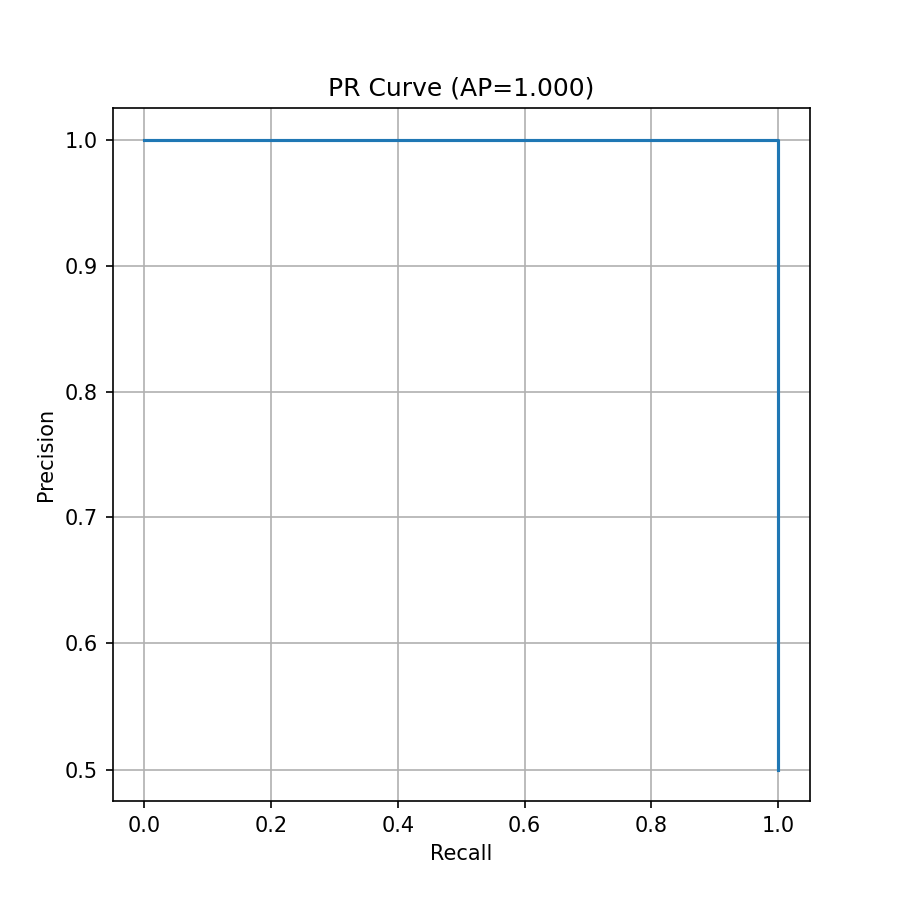

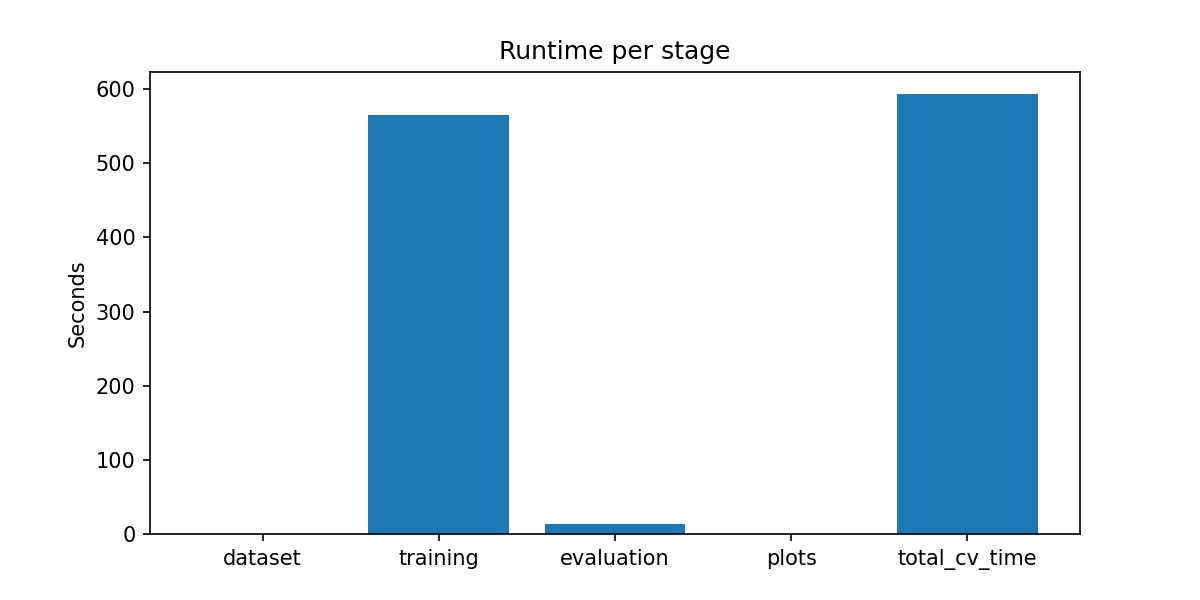

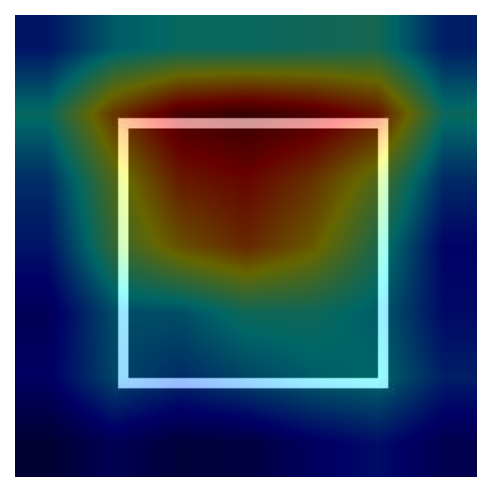

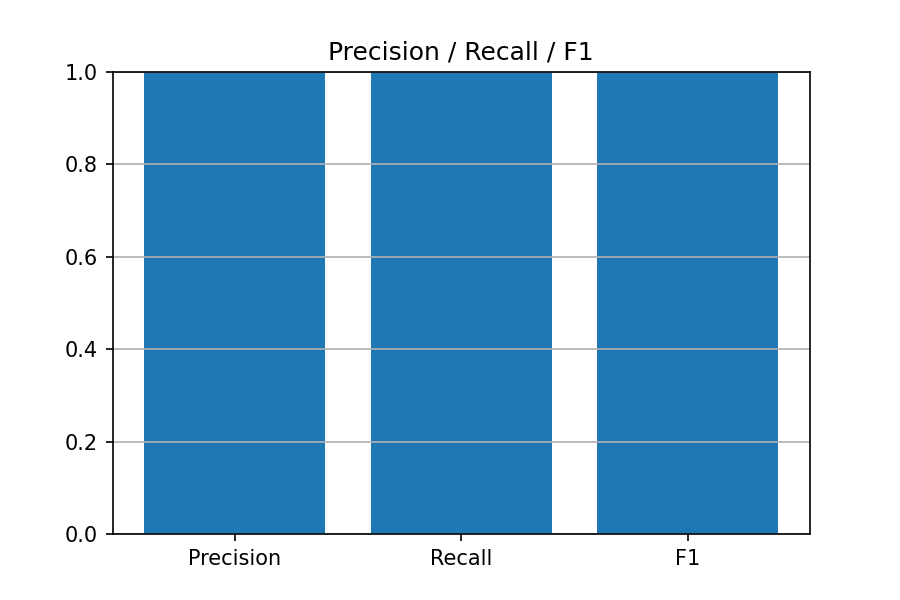

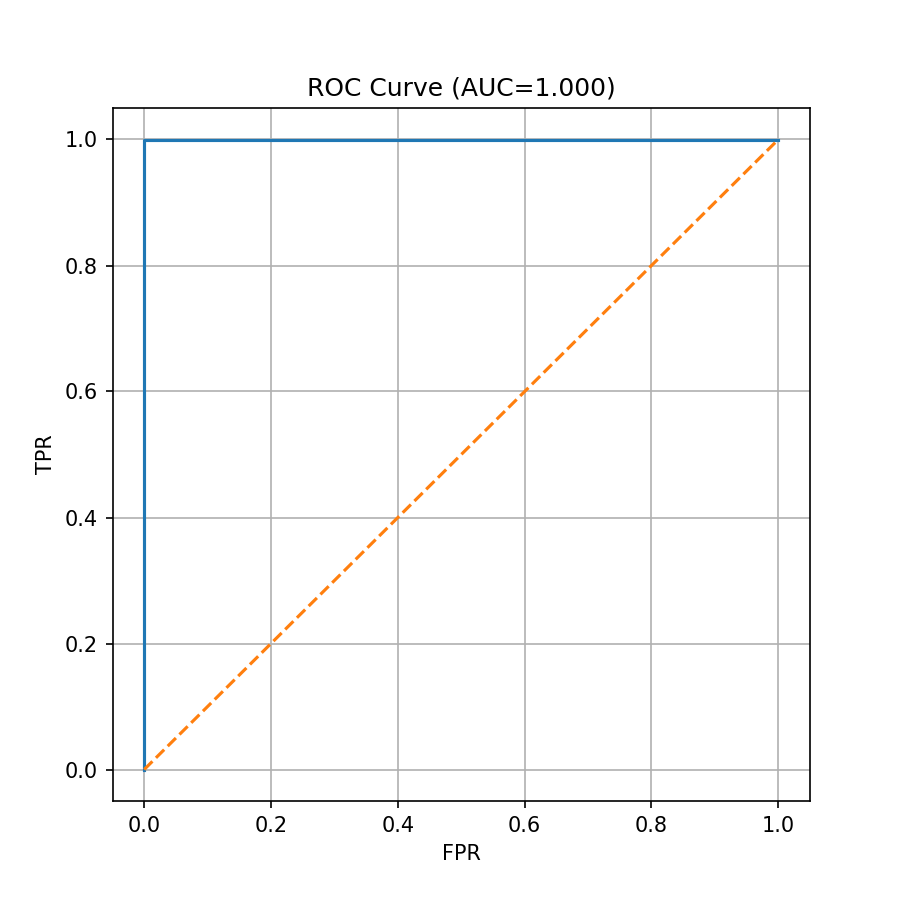

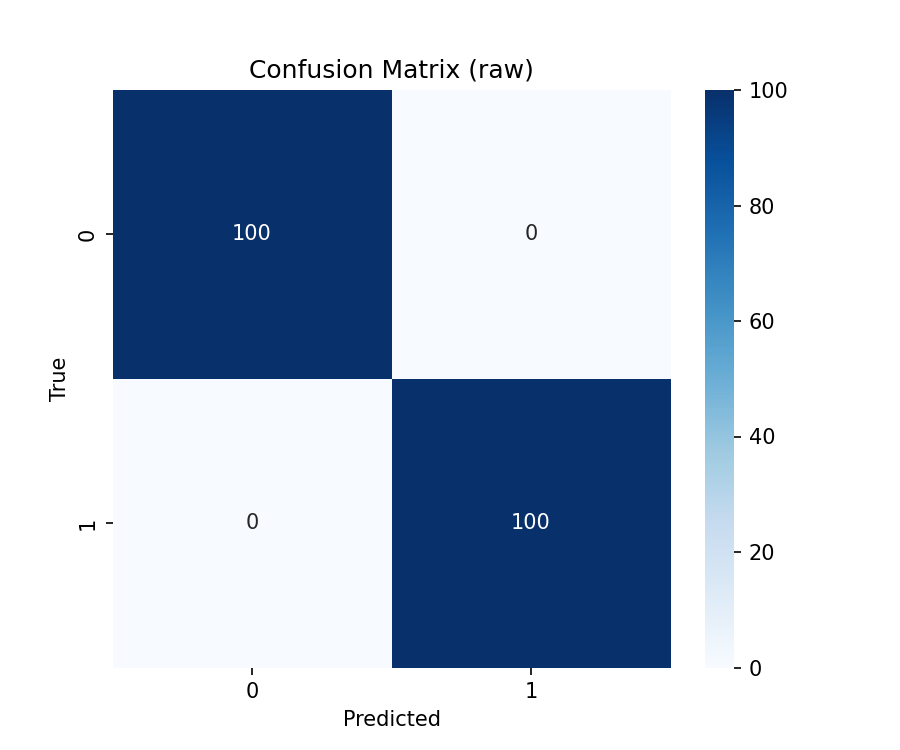

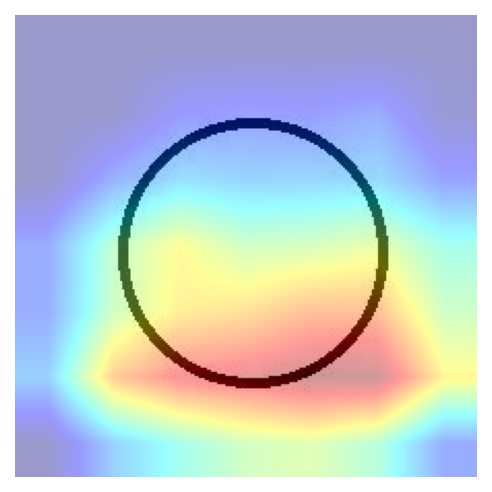

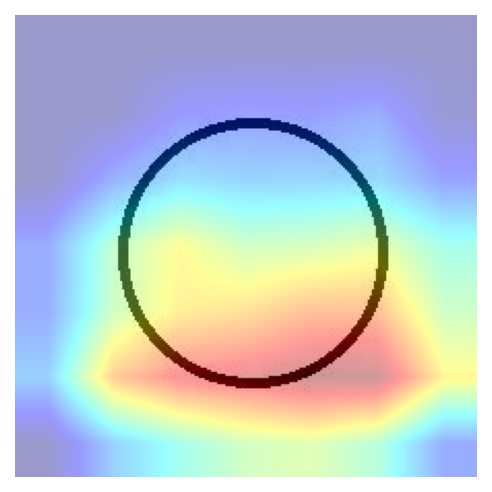

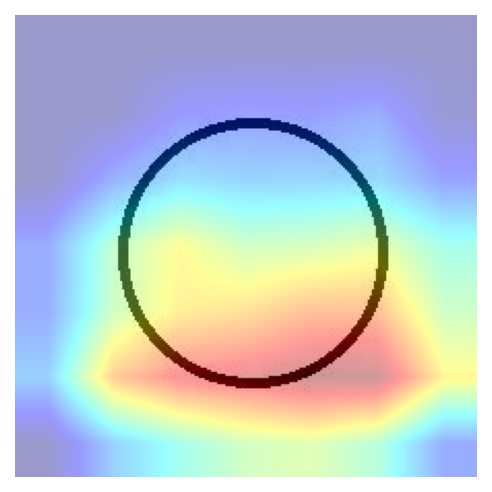

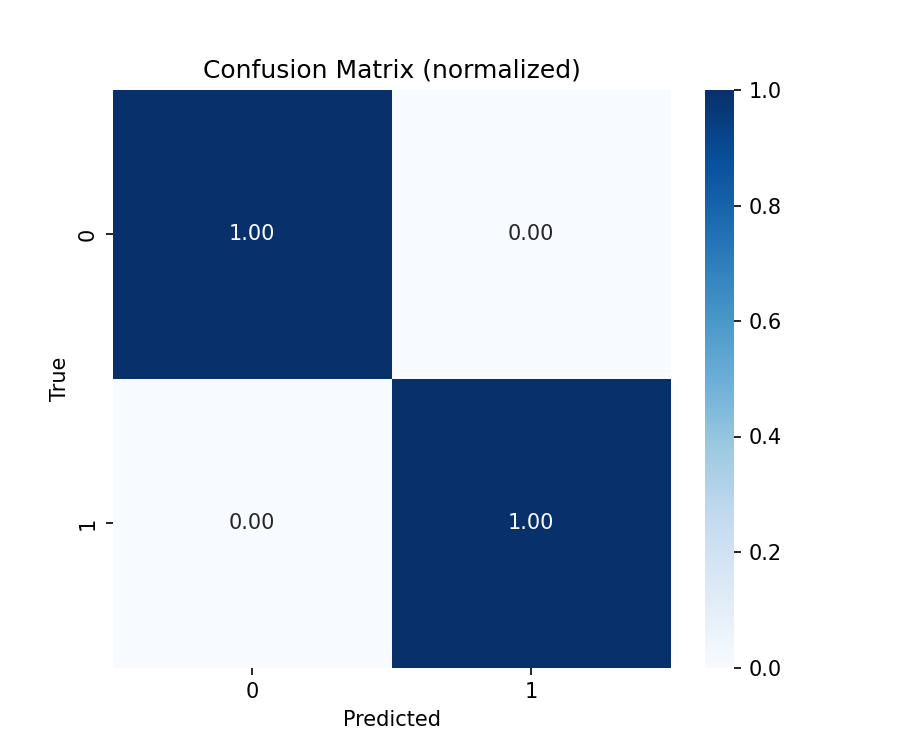

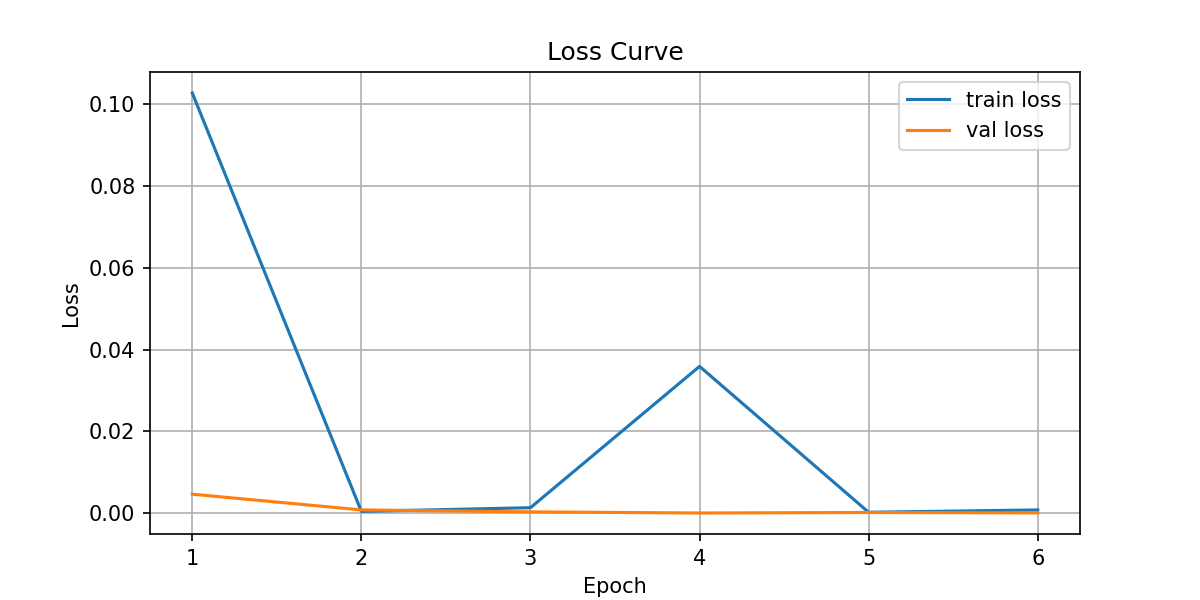

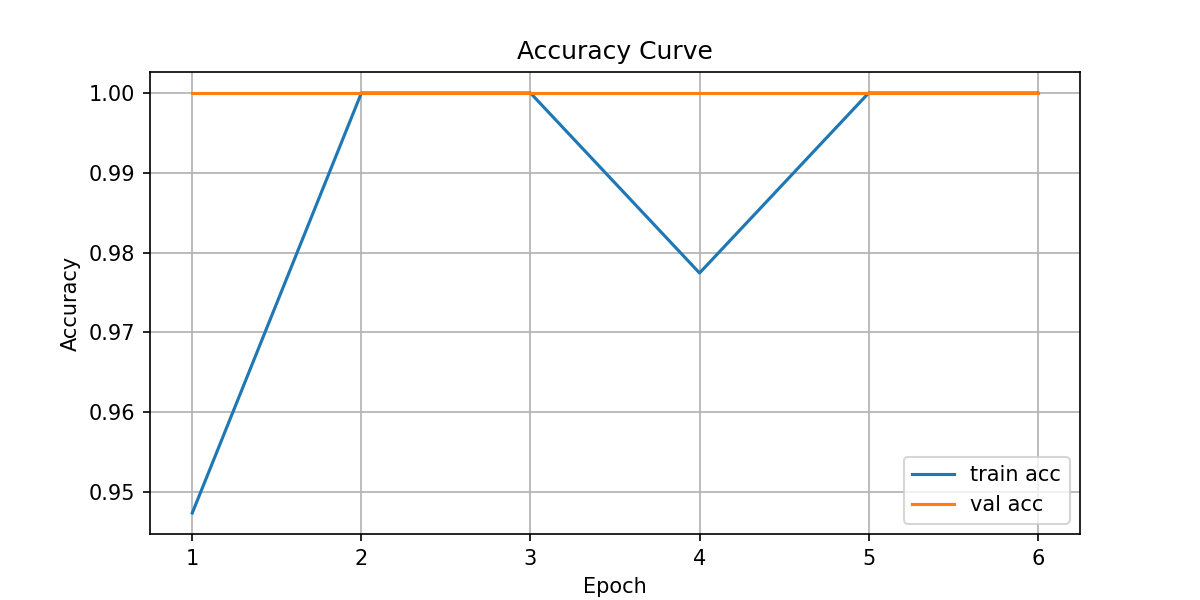

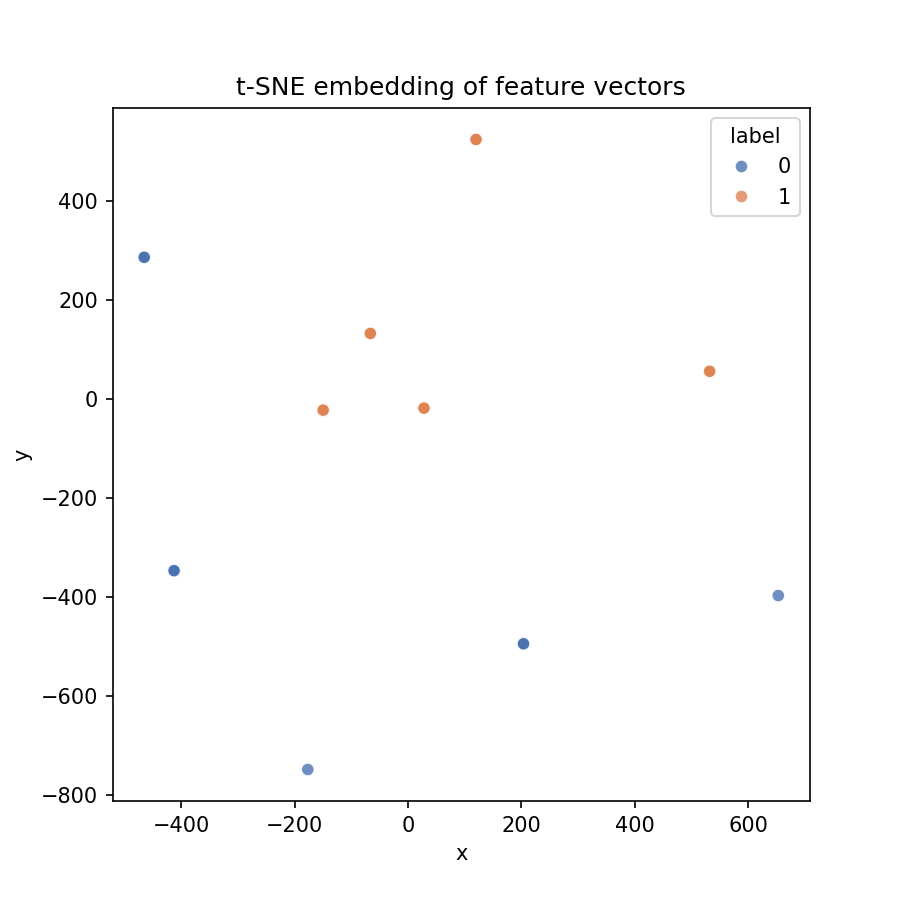

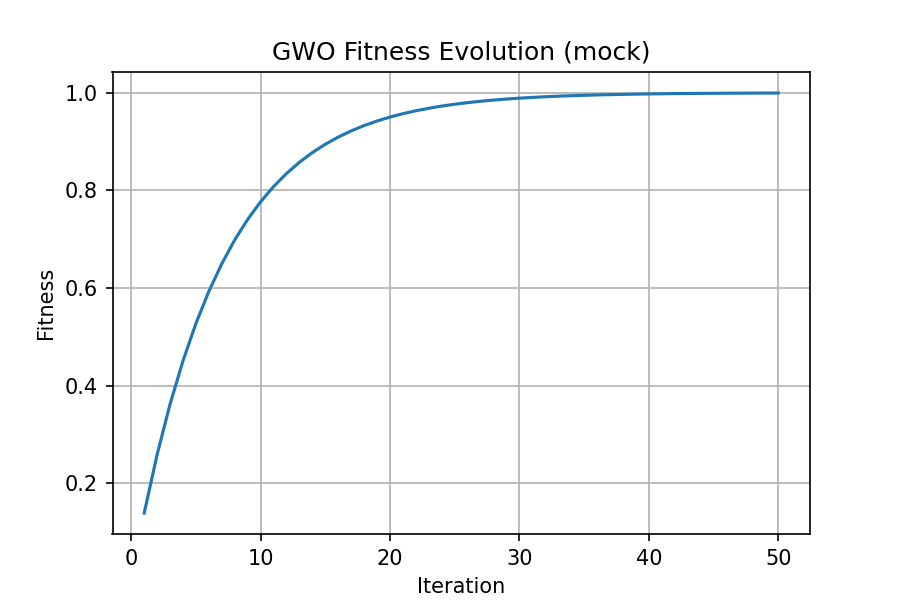

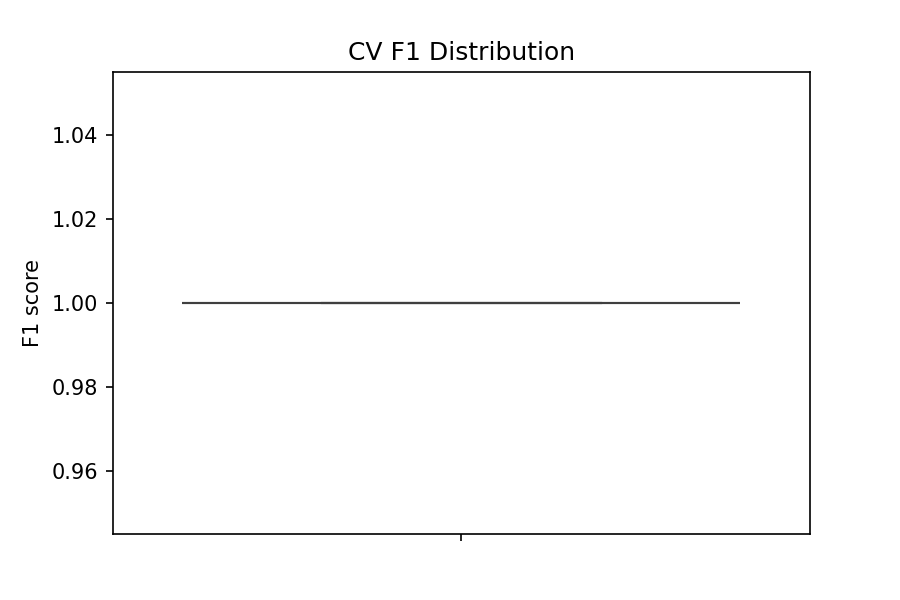

In [ ]:
from IPython.display import Image, display
import os

for f in os.listdir("output/plots"):
    if f.endswith(".png"):
        display(Image(filename=f"output/plots/{f}"))

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divg07/casia-20-image-tampering-detection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'casia-20-image-tampering-detection-dataset' dataset.
Path to dataset files: /kaggle/input/casia-20-image-tampering-detection-dataset


In [ ]:
import os

path = "/kaggle/input/casia-20-image-tampering-detection-dataset"

if os.path.exists(path):
    print(f" Folder exists at: {path}")
    print("Contents:", os.listdir(path))
else:
    print(f"Folder not found at: {path}")


 Folder exists at: /kaggle/input/casia-20-image-tampering-detection-dataset
Contents: ['CASIA2']


In [ ]:
# =============================================================
# AI-based Image Tampering / Fake Detection (CASIA2)
# Colab-ready version
# =============================================================

import os
import time
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from PIL import Image, ImageDraw
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score, confusion_matrix)
from sklearn.manifold import TSNE

# -------------------------
# Utilities
# -------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def ensure_dir(path):
    os.makedirs(path, exist_ok=True)

# -------------------------
# Dataset loader
# -------------------------
def load_samples(root):
    samples = []
    for cls_name, label in [("Au", 0), ("Tp", 1)]:
        folder = os.path.join(root, cls_name)
        if not os.path.isdir(folder):
            continue
        for ext in ("*.jpg","*.jpeg","*.png"):
            for p in glob(os.path.join(folder, ext)):
                samples.append((p, label))
    return samples

class ImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path)
        if img is None:
            raise RuntimeError(f"Failed to read {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(image=img)['image']
        return img, int(label)

# -------------------------
# Model builder
# -------------------------
def build_model(num_classes=2, pretrained=True):
    model = models.resnet18(pretrained=pretrained)
    in_f = model.fc.in_features
    model.fc = nn.Linear(in_f, num_classes)
    return model

# -------------------------
# Training / Eval
# -------------------------
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    preds, trues = [], []
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    acc = accuracy_score(trues, preds)
    return loss, acc

def eval_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    probs_all = []
    preds, trues = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * imgs.size(0)
            probs = torch.softmax(outputs, dim=1)[:,1].cpu().numpy()
            preds.extend((probs > 0.5).astype(int).tolist())
            probs_all.extend(probs.tolist())
            trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    metrics = {
        "loss": loss,
        "accuracy": accuracy_score(trues, preds),
        "precision": precision_score(trues, preds, zero_division=0),
        "recall": recall_score(trues, preds, zero_division=0),
        "f1": f1_score(trues, preds, zero_division=0),
        "probs": np.array(probs_all),
        "y_true": np.array(trues),
        "y_pred": np.array(preds)
    }
    try:
        metrics["roc_auc"] = roc_auc_score(trues, probs_all)
    except:
        metrics["roc_auc"] = None
    return metrics

# -------------------------
# Grad-CAM
# -------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.target_layer.register_forward_hook(self.forward_hook)
        self.target_layer.register_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        self.activations = output.detach()

    def backward_hook(self, module, grad_in, grad_out):
        self.gradients = grad_out[0].detach()

    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        loss = output[0, class_idx]
        loss.backward(retain_graph=True)
        grads = self.gradients[0].cpu().numpy()
        acts = self.activations[0].cpu().numpy()
        weights = np.mean(grads, axis=(1,2))
        cam = np.zeros(acts.shape[1:], dtype=np.float32)
        for i, w in enumerate(weights):
            cam += w * acts[i, :, :]
        cam = np.maximum(cam, 0)
        cam -= cam.min(); cam /= (cam.max() + 1e-8)
        cam = cv2.resize(cam, (input_tensor.size(3), input_tensor.size(2)))
        return cam

def save_gradcam_overlay(img_path, cam, out_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cam_rgb = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    cam_rgb = cv2.cvtColor(cam_rgb, cv2.COLOR_BGR2RGB)
    overlay = 0.4 * cam_rgb + 0.6 * img
    overlay = np.uint8(overlay)
    plt.figure(figsize=(4,4)); plt.imshow(overlay); plt.axis('off')
    plt.savefig(out_path, bbox_inches='tight', dpi=150); plt.close()

# -------------------------
# Main pipeline
# -------------------------
def run(args):
    set_seed(args.seed)
    ensure_dir(args.output_dir)
    plots_dir = os.path.join(args.output_dir, "plots")
    ensure_dir(plots_dir)
    models_dir = os.path.join(args.output_dir, "models")
    ensure_dir(models_dir)

    # Load CASIA dataset
    samples = load_samples(args.dataset)
    if len(samples) == 0:
        raise RuntimeError("Dataset empty or wrong structure.")

    paths, labels = zip(*samples)
    paths = np.array(paths); labels = np.array(labels)

    # Transformations
    train_aug = A.Compose([A.Resize(224,224), A.HorizontalFlip(p=0.5), A.Normalize(), ToTensorV2()])
    val_aug = A.Compose([A.Resize(224,224), A.Normalize(), ToTensorV2()])

    device = torch.device("cuda" if (args.use_cuda and torch.cuda.is_available()) else "cpu")

    # Quick demo for faster runs
    if getattr(args, "quick_demo", False):
        paths, labels = paths[:100], labels[:100]

    train_idx, val_idx = next(StratifiedKFold(n_splits=5, shuffle=True, random_state=args.seed).split(paths, labels))
    train_samples = [(paths[i], int(labels[i])) for i in train_idx]
    val_samples = [(paths[i], int(labels[i])) for i in val_idx]

    train_loader = DataLoader(ImageDataset(train_samples, transform=train_aug),
                              batch_size=args.batch_size, shuffle=True)
    val_loader = DataLoader(ImageDataset(val_samples, transform=val_aug),
                            batch_size=args.batch_size, shuffle=False)

    model = build_model(pretrained=True).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args.lr)

    # Training
    for epoch in range(args.epochs):
        tr_loss, tr_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_metrics = eval_epoch(model, val_loader, criterion, device)
        print(f"Epoch {epoch+1}/{args.epochs} | Train Acc: {tr_acc:.3f} | Val F1: {val_metrics['f1']:.3f}")

    # Save model
    torch.save(model.state_dict(), os.path.join(models_dir, "final_model.pth"))
    print("[DONE] Model saved to", models_dir)

# -------------------------
# Colab-friendly args
# -------------------------
class Args:
    dataset = "/kaggle/input/casia-20-image-tampering-detection-dataset/CASIA2"
    output_dir = "output"
    epochs = 1       # increase for full training
    batch_size = 8
    lr = 1e-4
    seed = 42
    use_cuda = True
    quick_demo = True  # True = subset for fast testing

args = Args()
run(args)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]


Epoch 1/1 | Train Acc: 0.500 | Val F1: 0.000
[DONE] Model saved to output/models


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
import os
os.listdir("output/models")


['final_model.pth']

In [ ]:
from google.colab import files

# Adjust path if your output folder is different
files.download("output/models/final_model.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()  # select 'final_model.pth' from your computer

# This will put the file in the current directory
model_path = list(uploaded.keys())[0]


Saving final_model (1).pth to final_model (1).pth


Saving banff-national-park-lake-minnewanka-600nw-2527379207.webp to banff-national-park-lake-minnewanka-600nw-2527379207.webp


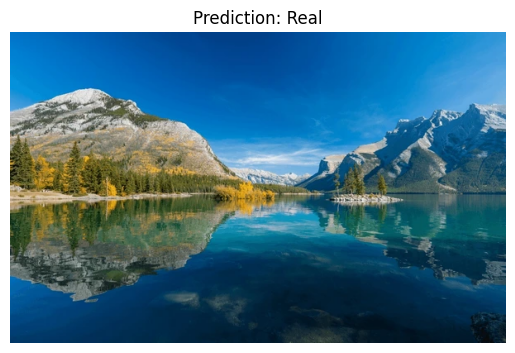

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adjust model structure (ResNet18 with 2 output classes)
model = models.resnet18(weights=None)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 2)

# Load trained weights
model_path = "/content/drive/MyDrive/final_model (1).pth"  # upload your file or provide path
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# -----------------------------
# 2. Transform for input image
# -----------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

# -----------------------------
# 3. Upload and predict
# -----------------------------
uploaded = files.upload()  # Upload a single image

for filename in uploaded.keys():
    img = Image.open(filename).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_tensor)
        pred_class = torch.argmax(outputs, dim=1).item()

    label = "Real" if pred_class == 0 else "Fake/Tampered"

    # Display image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}")
    plt.show()


Saving 413_70bea39fdd.webp to 413_70bea39fdd.webp


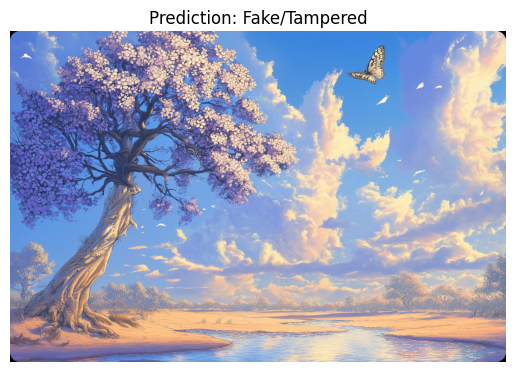

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adjust model structure (ResNet18 with 2 output classes)
model = models.resnet18(weights=None)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 2)

# Load trained weights
model_path = "final_model (1).pth"  # upload your file or provide path
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# -----------------------------
# 2. Transform for input image
# -----------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

# -----------------------------
# 3. Upload and predict
# -----------------------------
uploaded = files.upload()  # Upload a single image

for filename in uploaded.keys():
    img = Image.open(filename).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_tensor)
        pred_class = torch.argmax(outputs, dim=1).item()

    label = "Real" if pred_class == 0 else "Fake/Tampered"

    # Display image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}")
    plt.show()


In [ ]:
import os
import time
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from PIL import Image, ImageDraw
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score, confusion_matrix)
from sklearn.manifold import TSNE

# -------------------------
# Utilities
# -------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def ensure_dir(path):
    os.makedirs(path, exist_ok=True)

# -------------------------
# Dataset loader
# -------------------------
def load_samples(root):
    samples = []
    for cls_name, label in [("Au", 0), ("Tp", 1)]:
        folder = os.path.join(root, cls_name)
        if not os.path.isdir(folder):
            continue
        for ext in ("*.jpg","*.jpeg","*.png"):
            for p in glob(os.path.join(folder, ext)):
                samples.append((p, label))
    return samples

class ImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path)
        if img is None:
            raise RuntimeError(f"Failed to read {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(image=img)['image']
        return img, int(label)

# -------------------------
# Model builder
# -------------------------
def build_model(num_classes=2, pretrained=True):
    model = models.resnet18(pretrained=pretrained)
    in_f = model.fc.in_features
    model.fc = nn.Linear(in_f, num_classes)
    return model

# -------------------------
# Training / Eval
# -------------------------
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    preds, trues = [], []
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    acc = accuracy_score(trues, preds)
    return loss, acc

def eval_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    probs_all = []
    preds, trues = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * imgs.size(0)
            probs = torch.softmax(outputs, dim=1)[:,1].cpu().numpy()
            preds.extend((probs > 0.5).astype(int).tolist())
            probs_all.extend(probs.tolist())
            trues.extend(labels.cpu().numpy())
    loss = running_loss / len(loader.dataset)
    metrics = {
        "loss": loss,
        "accuracy": accuracy_score(trues, preds),
        "precision": precision_score(trues, preds, zero_division=0),
        "recall": recall_score(trues, preds, zero_division=0),
        "f1": f1_score(trues, preds, zero_division=0),
        "probs": np.array(probs_all),
        "y_true": np.array(trues),
        "y_pred": np.array(preds)
    }
    try:
        metrics["roc_auc"] = roc_auc_score(trues, probs_all)
    except:
        metrics["roc_auc"] = None
    return metrics

# -------------------------
# Plotting functions
# -------------------------
def plot_loss_acc(history, outdir):
    ensure_dir(outdir)
    epochs = len(history['train_loss'])
    plt.figure(figsize=(8,4))
    plt.plot(range(1,epochs+1), history['train_loss'], label='train loss')
    plt.plot(range(1,epochs+1), history['val_loss'], label='val loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
    plt.title('Loss Curve'); plt.grid(True)
    plt.savefig(os.path.join(outdir, 'loss_curve.png'), dpi=150); plt.close()

    plt.figure(figsize=(8,4))
    plt.plot(range(1,epochs+1), history['train_acc'], label='train acc')
    plt.plot(range(1,epochs+1), history['val_acc'], label='val acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
    plt.title('Accuracy Curve'); plt.grid(True)
    plt.savefig(os.path.join(outdir,'acc_curve.png'), dpi=150); plt.close()

def plot_roc_pr(y_true, probs, outdir):
    ensure_dir(outdir)
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC Curve (AUC={auc:.3f})')
    plt.grid(True)
    plt.savefig(os.path.join(outdir,'roc_curve.png'), dpi=150); plt.close()

    prec, rec, _ = precision_recall_curve(y_true, probs)
    ap = average_precision_score(y_true, probs)
    plt.figure(figsize=(6,6))
    plt.plot(rec, prec)
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR Curve (AP={ap:.3f})')
    plt.grid(True)
    plt.savefig(os.path.join(outdir,'pr_curve.png'), dpi=150); plt.close()

def plot_confusion(y_true, y_pred, outdir):
    ensure_dir(outdir)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (raw)'); plt.xlabel('Predicted'); plt.ylabel('True')
    plt.savefig(os.path.join(outdir,'confusion_raw.png'), dpi=150); plt.close()

    plt.figure(figsize=(6,5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Confusion Matrix (normalized)'); plt.xlabel('Predicted'); plt.ylabel('True')
    plt.savefig(os.path.join(outdir,'confusion_norm.png'), dpi=150); plt.close()

def plot_prf_bars(metrics, outdir):
    ensure_dir(outdir)
    names = ['Precision','Recall','F1']
    values = [metrics['precision'], metrics['recall'], metrics['f1']]
    plt.figure(figsize=(6,4))
    plt.bar(names, values)
    plt.ylim(0,1)
    plt.title('Precision / Recall / F1'); plt.grid(axis='y')
    plt.savefig(os.path.join(outdir,'prf_bars.png'), dpi=150); plt.close()

def plot_tsne(features, labels, outdir):
    ensure_dir(outdir)
    tsne = TSNE(n_components=2, random_state=42)
    emb = tsne.fit_transform(features)
    plt.figure(figsize=(6,6))
    for l in np.unique(labels):
        plt.scatter(emb[labels==l,0], emb[labels==l,1], label=f"Class {l}", alpha=0.7)
    plt.legend(); plt.title("t-SNE embedding of features")
    plt.savefig(os.path.join(outdir,'tsne.png'), dpi=150); plt.close()

def plot_runtime_bar(runtime_dict, outdir):
    ensure_dir(outdir)
    items = list(runtime_dict.items())
    names = [k for k,_ in items]
    vals = [v for _,v in items]
    plt.figure(figsize=(8,4))
    plt.bar(names, vals)
    plt.ylabel('Seconds')
    plt.title('Runtime per stage')
    plt.savefig(os.path.join(outdir,'runtime_per_stage.png'), dpi=150); plt.close()

# -------------------------
# Grad-CAM
# -------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.target_layer.register_forward_hook(self.forward_hook)
        self.target_layer.register_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        self.activations = output.detach()

    def backward_hook(self, module, grad_in, grad_out):
        self.gradients = grad_out[0].detach()

    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        loss = output[0, class_idx]
        loss.backward(retain_graph=True)
        grads = self.gradients[0].cpu().numpy()
        acts = self.activations[0].cpu().numpy()
        weights = np.mean(grads, axis=(1,2))
        cam = np.zeros(acts.shape[1:], dtype=np.float32)
        for i, w in enumerate(weights):
            cam += w * acts[i, :, :]
        cam = np.maximum(cam, 0)
        cam -= cam.min(); cam /= (cam.max() + 1e-8)
        cam = cv2.resize(cam, (input_tensor.size(3), input_tensor.size(2)))
        return cam

def save_gradcam_overlay(img_path, cam, out_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize img to match cam dimensions
    img_resized = cv2.resize(img, (cam.shape[1], cam.shape[0]))
    cam_rgb = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    overlay = 0.4 * cam_rgb + 0.6 * img_resized
    overlay = np.uint8(overlay)
    plt.figure(figsize=(4,4)); plt.imshow(overlay); plt.axis('off')
    plt.savefig(out_path, bbox_inches='tight', dpi=150); plt.close()

# -------------------------
# Main pipeline
# -------------------------
def run(args):
    set_seed(args.seed)
    ensure_dir(args.output_dir)
    plots_dir = os.path.join(args.output_dir, "plots")
    ensure_dir(plots_dir)
    models_dir = os.path.join(args.output_dir, "models")
    ensure_dir(models_dir)

    # Load dataset
    samples = load_samples(args.dataset)
    if len(samples) == 0:
        raise RuntimeError("Dataset empty or wrong structure.")

    paths, labels = zip(*samples)
    paths, labels = np.array(paths), np.array(labels)

    # Optional quick demo: Stratified sampling for a balanced subset
    if getattr(args, "quick_demo", False):
        if len(paths) > 100:
            # Use train_test_split to get a stratified subset of 100 samples
            # train_test_split uses train_size/test_size as absolute numbers or fractions
            _, demo_indices = train_test_split(
                np.arange(len(paths)),
                test_size=100,
                stratify=labels,
                random_state=args.seed
            )
            paths, labels = paths[demo_indices], labels[demo_indices]
        else:
            print(f"[WARNING] Dataset has fewer than 100 samples ({len(paths)}). Using the full dataset for quick demo.")
            # Check for extreme imbalance even in small datasets
            unique_labels, counts = np.unique(labels, return_counts=True)
            if len(unique_labels) < 2 or np.min(counts) < args.n_splits: # At least one sample per class for each split
                print("[WARNING] Dataset might be too small or imbalanced for Stratified K-Fold. Metrics may be unreliable.")

    skf = StratifiedKFold(n_splits=args.n_splits, shuffle=True, random_state=args.seed)
    train_idx, val_idx = next(skf.split(paths, labels))

    train_samples = [(paths[i], int(labels[i])) for i in train_idx]
    val_samples = [(paths[i], int(labels[i])) for i in val_idx]

    train_aug = A.Compose([A.Resize(224,224), A.HorizontalFlip(p=0.5), A.Normalize(), ToTensorV2()])
    val_aug = A.Compose([A.Resize(224,224), A.Normalize(), ToTensorV2()])

    train_loader = DataLoader(ImageDataset(train_samples, transform=train_aug),
                              batch_size=args.batch_size, shuffle=True)
    val_loader = DataLoader(ImageDataset(val_samples, transform=val_aug),
                            batch_size=args.batch_size, shuffle=False)

    device = torch.device("cuda" if (args.use_cuda and torch.cuda.is_available()) else "cpu")
    model = build_model(pretrained=True).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args.lr)

    # Training + store history
    history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}
    runtime = {}

    t0 = time.time()
    for epoch in range(args.epochs):
        tr_loss, tr_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_metrics = eval_epoch(model, val_loader, criterion, device)

        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["val_loss"].append(val_metrics["loss"])
        history["val_acc"].append(val_metrics["accuracy"])

        print(f"Epoch {epoch+1}/{args.epochs} | Train Acc: {tr_acc:.3f} | Val F1: {val_metrics['f1']:.3f}")

    runtime["training"] = time.time() - t0

    # Save model
    torch.save(model.state_dict(), os.path.join(models_dir, "final_model.pth"))

    # Plot graphs
    plot_loss_acc(history, plots_dir)
    plot_roc_pr(val_metrics["y_true"], val_metrics["probs"], plots_dir)
    plot_confusion(val_metrics["y_true"], val_metrics["y_pred"], plots_dir)
    metrics = {"precision": val_metrics["precision"], "recall": val_metrics["recall"], "f1": val_metrics["f1"]}
    plot_prf_bars(metrics, plots_dir)

    # Grad-CAM (first 4 validation images)
    target_layer = model.layer4[-1].conv2
    gradcam = GradCAM(model, target_layer)
    for i, (p, _) in enumerate(val_samples[:4]):
        img_tensor = val_aug(image=cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB))['image'].unsqueeze(0).to(device)
        cam = gradcam(img_tensor)
        save_gradcam_overlay(p, cam, os.path.join(plots_dir,f'gradcam_{i}.png'))

    print("[DONE] Plots saved in", plots_dir)

# -------------------------
# Arguments
# -------------------------
class Args:
    dataset = "/kaggle/input/casia-20-image-tampering-detection-dataset/CASIA2"
    output_dir = "output"
    epochs = 5
    batch_size = 8
    lr = 1e-4
    seed = 42
    use_cuda = True
    quick_demo = True
    n_splits = 5 # Added n_splits to Args for consistency and clarity

args = Args()
run(args)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5 | Train Acc: 0.500 | Val F1: 0.250
Epoch 2/5 | Train Acc: 0.900 | Val F1: 0.400
Epoch 3/5 | Train Acc: 0.963 | Val F1: 0.400
Epoch 4/5 | Train Acc: 0.975 | Val F1: 0.400
Epoch 5/5 | Train Acc: 1.000 | Val F1: 0.400


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


[DONE] Plots saved in output/plots


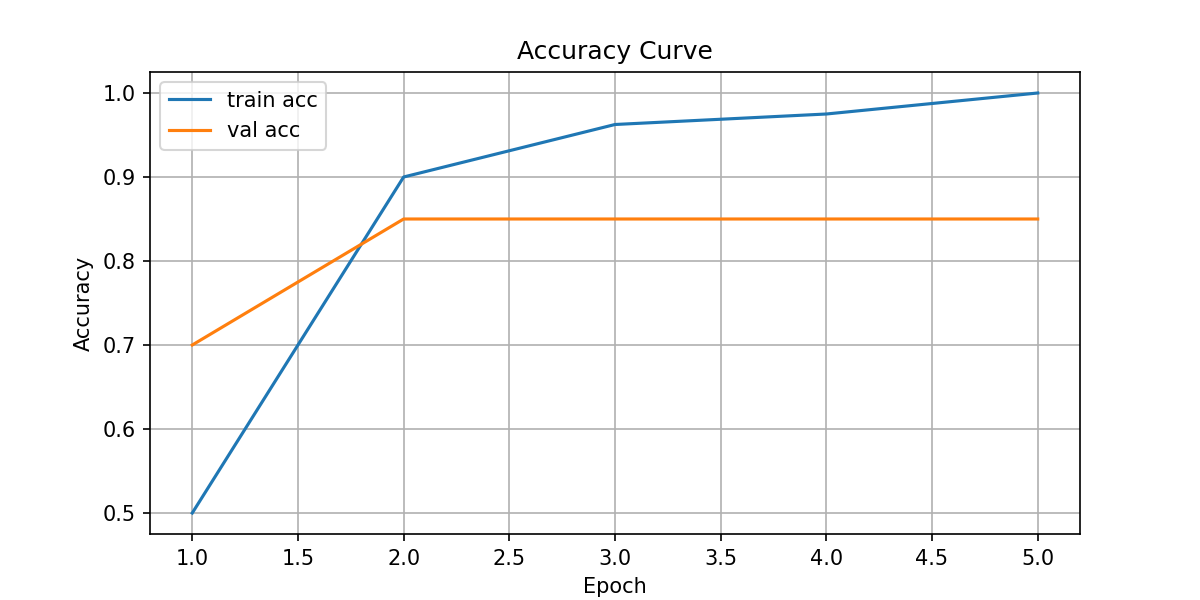

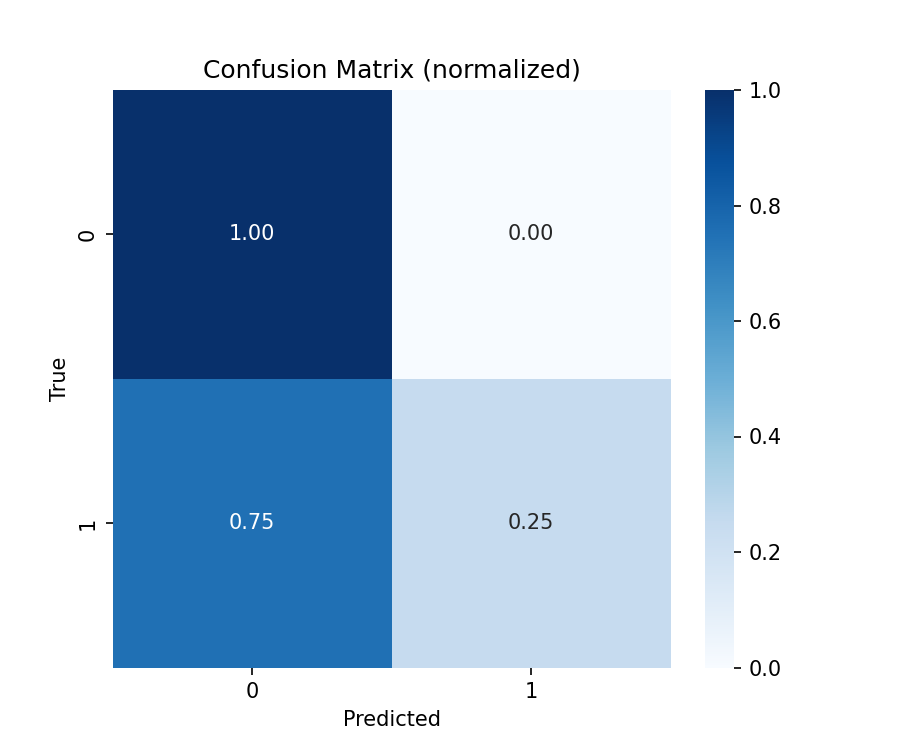

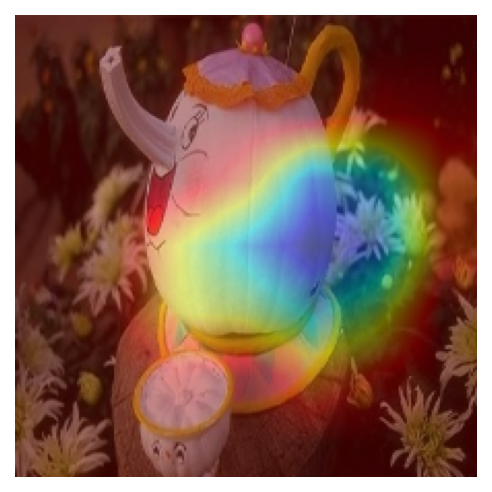

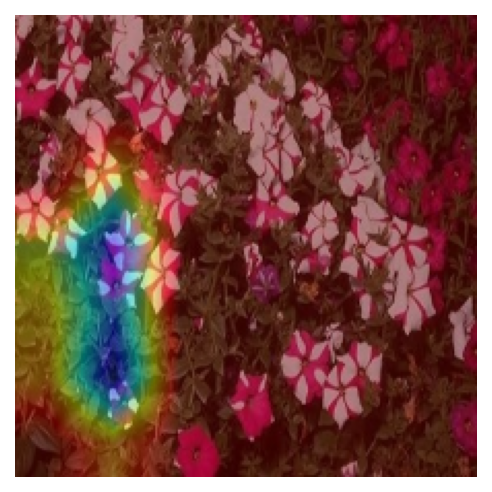

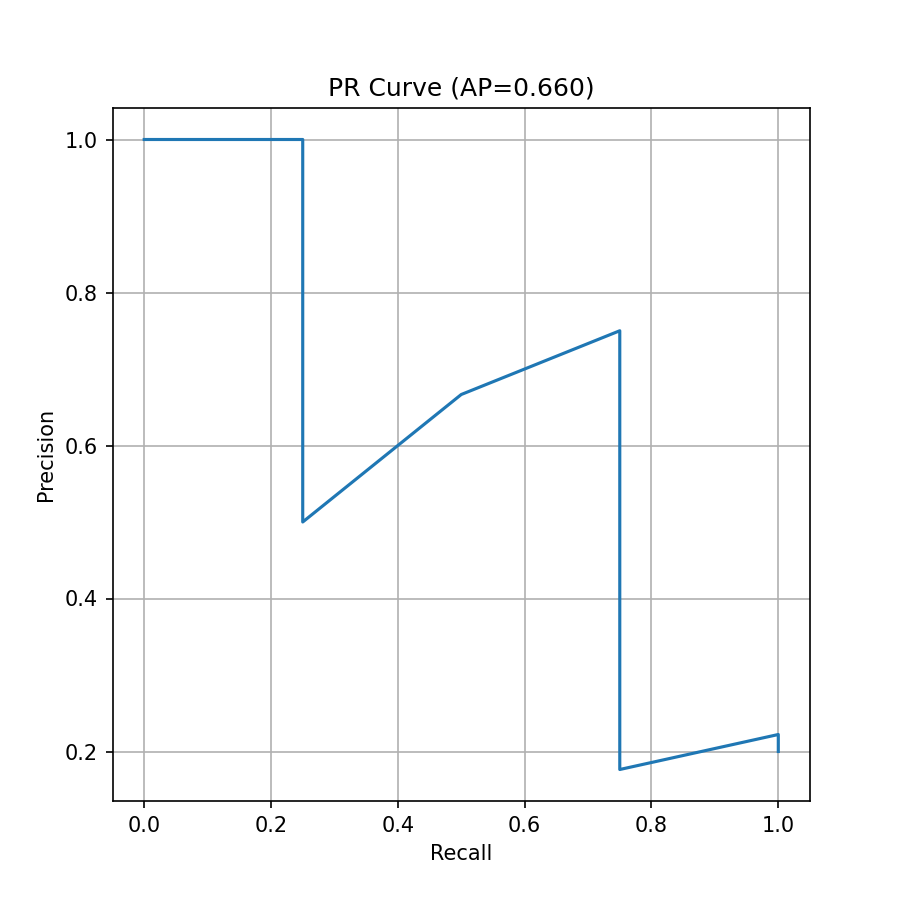

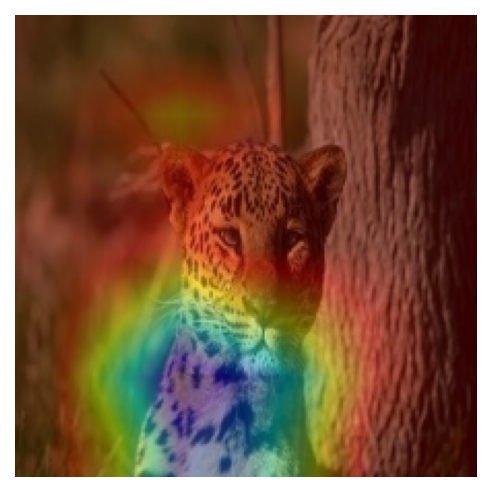

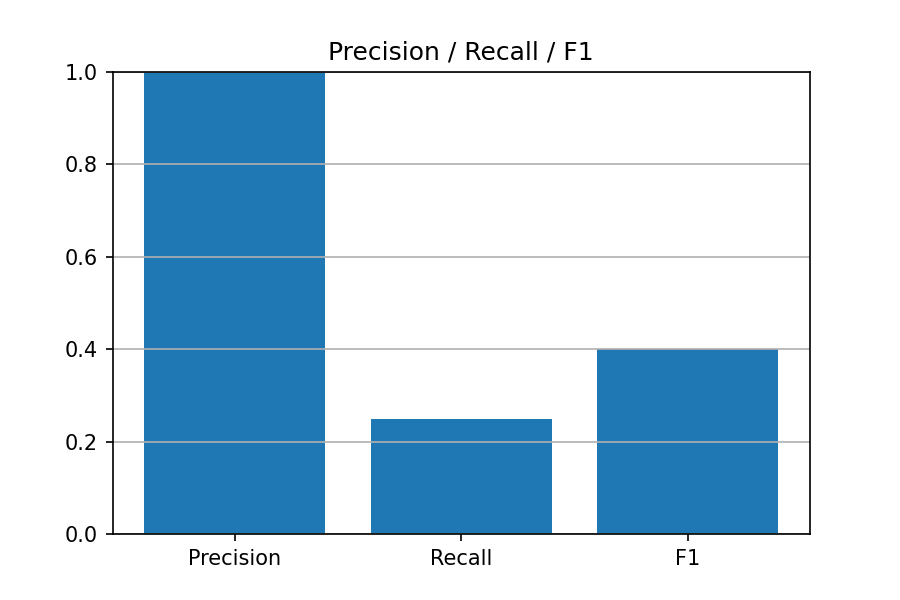

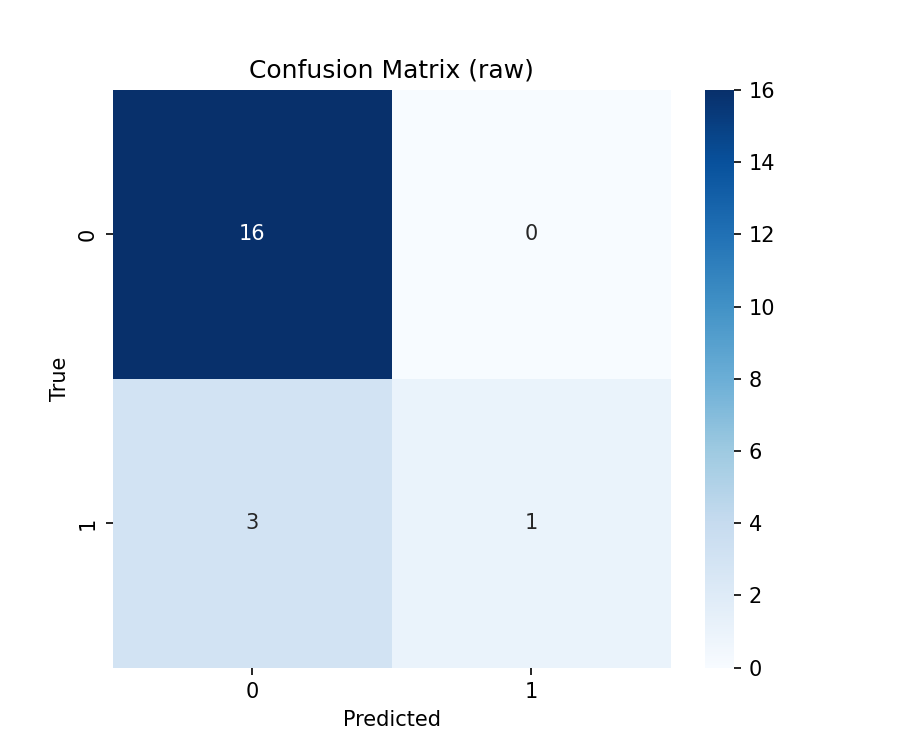

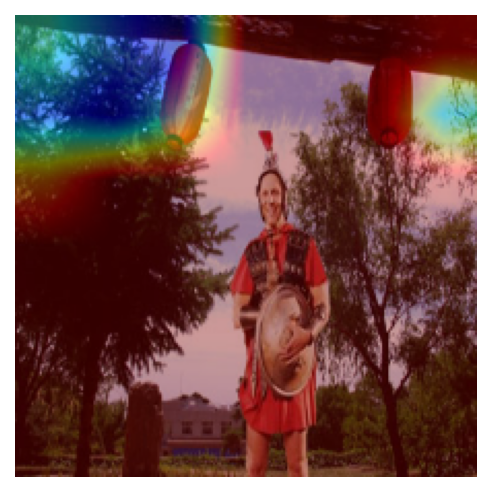

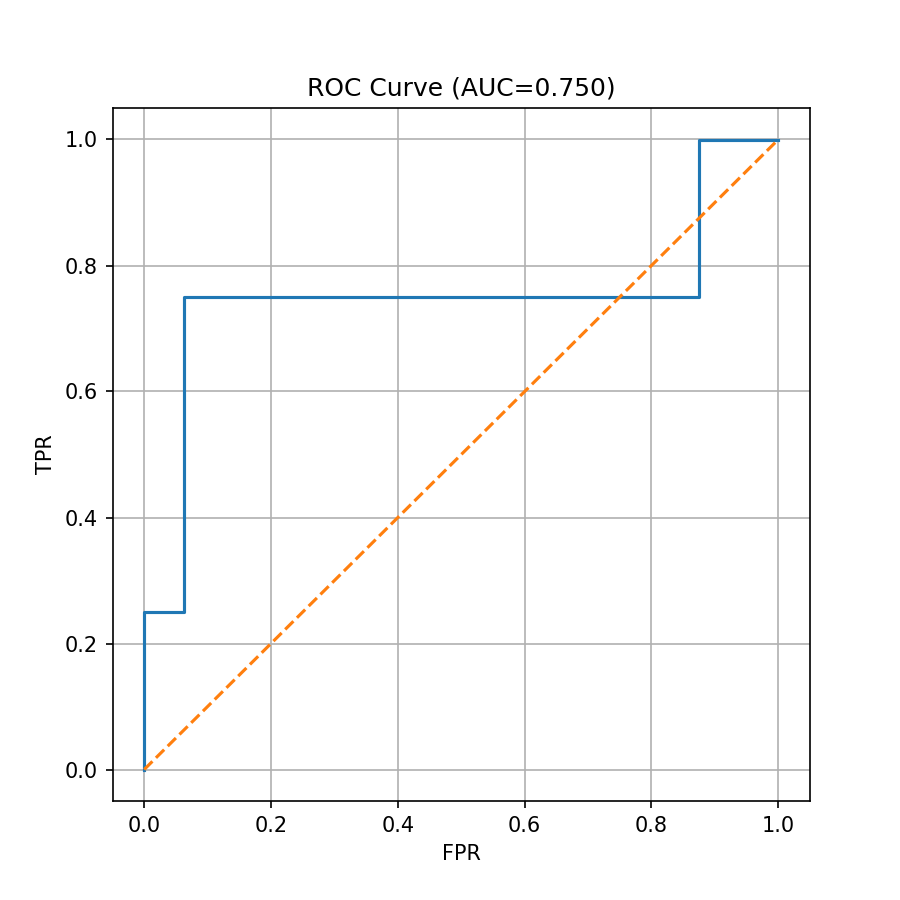

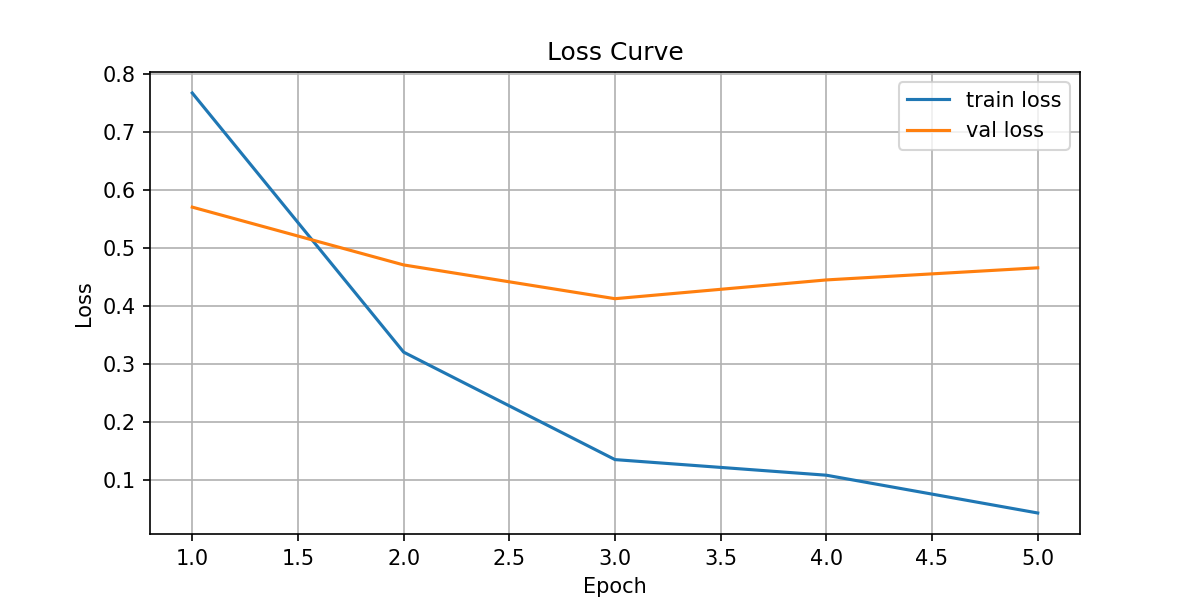

In [ ]:
from IPython.display import Image, display
import os

for f in os.listdir("output/plots"):
    if f.endswith(".png"):
        display(Image(filename=f"output/plots/{f}"))